# 1. BTC/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [3]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2024,"62,382.30","61,167.90","63,100.00","60,784.00",47.75K,2.01%
1,2/29/2024,"61,153.10","62,438.20","63,659.80","60,520.60",78.40K,-2.08%
2,2/28/2024,"62,451.10","57,040.00","63,890.00","56,698.00",118.76K,9.49%
3,2/27/2024,"57,037.30","54,476.50","57,542.40","54,452.90",67.20K,4.69%
4,2/26/2024,"54,484.60","51,728.80","54,891.10","50,925.90",51.25K,5.34%
...,...,...,...,...,...,...,...
1823,3/5/2019,"3,857.50","3,716.10","3,876.00","3,705.40",30.82K,3.83%
1824,3/4/2019,"3,715.00","3,807.80","3,828.00","3,674.90",32.61K,-2.40%
1825,3/3/2019,"3,806.40","3,820.30","3,834.70","3,784.80",15.99K,-0.36%
1826,3/2/2019,"3,820.00","3,820.50","3,840.40","3,775.00",18.49K,-0.08%


In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 3s 52ms/step - loss: 0.0242 - val_loss: 0.0024
Epoch 2/100
19/19 [==============================] - 1s 33ms/step - loss: 0.0032 - val_loss: 4.1044e-04
Epoch 3/100
19/19 [==============================] - 1s 34ms/step - loss: 9.1251e-04 - val_loss: 6.3501e-04
Epoch 4/100
19/19 [==============================] - 1s 33ms/step - loss: 6.8434e-04 - val_loss: 2.8024e-04
Epoch 5/100
19/19 [==============================] - 1s 33ms/step - loss: 6.2015e-04 - val_loss: 2.8268e-04
Epoch 6/100
19/19 [==============================] - 1s 33ms/step - loss: 5.8900e-04 - val_loss: 2.6623e-04
Epoch 7/100
19/19 [==============================] - 1s 33ms/step - loss: 5.7245e-04 - val_loss: 2.5104e-04
Epoch 8/100
19/19 [==============================] - 1s 34ms/step - loss: 5.5155e-04 - val_loss: 2.4480e-04
Epoch 9/100
19/19 [==============================] - 1s 34ms/step - loss: 5.3251e-04 - val_loss: 2.8233e-04
Epoch 10/100
19/19 [====================

In [10]:
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 6ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 31701.4414066797


In [13]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52623776 0.53278113 0.5339033  0.52861061 0.525498   0.53446595
 0.53506152 0.53283128 0.54803699 0.56012381 0.56818431 0.59989186
 0.63250999 0.62782697 0.62016456 0.63405689 0.62688817 0.62807774
 0.58843508 0.59207586 0.61384531 0.6160536  0.59892171 0.60438837
 0.59022961 0.6103926  0.6041235  0.62607946 0.62921088 0.63069822
 0.62670794 0.61532795 0.62473317 0.60802131 0.62252645 0.60905101
 0.60114568 0.60217851 0.60427553 0.63419168 0.64605909 0.61303816
 0.63363216 0.63365097 0.63078599 0.63015908 0.67762715 0.66444636
 0.67237677 0.66808087 0.6132278  0.61338453 0.59607241 0.60819842
 0.61793276 0.61231722 0.58904475 0.59468694 0.59526683 0.59345349
 0.56193402 0.56701983 0.57001646 0.56771883 0.59709427 0.60192148
 0.60051877 0.62044824 0.61489382 0.60923439 0.61700337 0.61883865
 0.61580911 0.60916699 0.61113863 0.61712405 0.63682313 0.65157276
 0.68030875 0.69022334 0.69836376 0.72439464 0.72082282 0.75304913
 0.75498472 0.75870386 0.75115743 0.75860826 0.753

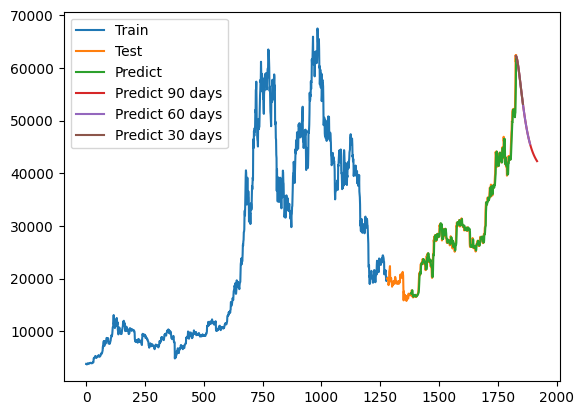

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 2. ETH/USD Dataset (Data split 7:3)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [17]:
df = pd.read_csv('../Dataset/ETH_USD Binance Historical Data (1).csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [20]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 47ms/step - loss: 0.0646 - val_loss: 0.0098
Epoch 2/100
19/19 [==============================] - 1s 32ms/step - loss: 0.0106 - val_loss: 0.0014
Epoch 3/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0014 - val_loss: 2.9201e-04
Epoch 4/100
19/19 [==============================] - 1s 32ms/step - loss: 9.8657e-04 - val_loss: 2.0495e-04
Epoch 5/100
19/19 [==============================] - 1s 31ms/step - loss: 8.2357e-04 - val_loss: 2.0563e-04
Epoch 6/100
19/19 [==============================] - 1s 32ms/step - loss: 7.7689e-04 - val_loss: 2.5544e-04
Epoch 7/100
19/19 [==============================] - 1s 30ms/step - loss: 7.5781e-04 - val_loss: 1.9680e-04
Epoch 8/100
19/19 [==============================] - 1s 32ms/step - loss: 7.4003e-04 - val_loss: 1.8442e-04
Epoch 9/100
19/19 [==============================] - 1s 31ms/step - loss: 7.0877e-04 - val_loss: 2.2899e-04
Epoch 10/100
19/19 [============================

In [25]:
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 7ms/step


In [26]:
y_pred=scaler.inverse_transform(y_pred)

In [27]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 1890.2130107435198


In [28]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.4158102  0.41979487 0.42027567 0.41585913 0.4084344  0.41295094
 0.40876416 0.41357002 0.42115643 0.43766102 0.44362208 0.45442729
 0.46500061 0.45225305 0.47828002 0.47884804 0.47503994 0.47753116
 0.45053196 0.44588566 0.45794393 0.46967882 0.4494874  0.45132337
 0.44451134 0.44914913 0.44033945 0.44560909 0.45357419 0.4715616
 0.46824706 0.45866512 0.46032877 0.4516829  0.4831497  0.47586326
 0.46624941 0.46465171 0.4625647  0.47749287 0.47817364 0.44714935
 0.45945014 0.45963736 0.45375502 0.44969588 0.4730125  0.47585049
 0.52636842 0.53407822 0.51408251 0.52564722 0.50343473 0.51150407
 0.52783847 0.5156249  0.5025327  0.5072173  0.50301563 0.49983512
 0.46931503 0.45443154 0.45251047 0.44890448 0.45952248 0.45959694
 0.45725464 0.47021068 0.47559095 0.46283488 0.46733227 0.46840236
 0.46567713 0.4642475  0.46681318 0.48187537 0.49294226 0.49185727
 0.50602381 0.50901923 0.51038079 0.54254113 0.53875856 0.56750012
 0.57759903 0.5731761  0.56979775 0.58987429 0.6036

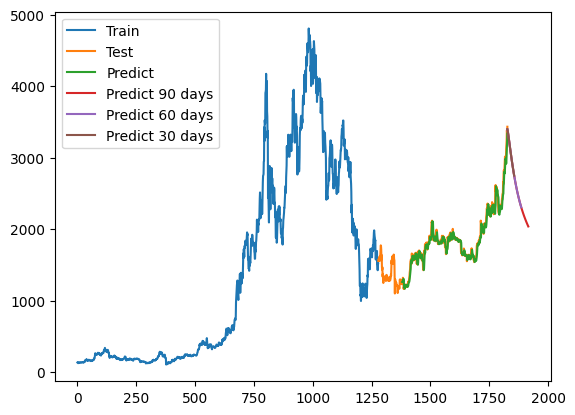

In [29]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 3. BNB/USD Dataset (Data split 7:3)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [31]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [33]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [34]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [35]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [36]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [37]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 46ms/step - loss: 0.0729 - val_loss: 0.0109
Epoch 2/100
19/19 [==============================] - 1s 30ms/step - loss: 0.0116 - val_loss: 0.0013
Epoch 3/100
19/19 [==============================] - 1s 29ms/step - loss: 0.0017 - val_loss: 2.7969e-04
Epoch 4/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0012 - val_loss: 2.2951e-04
Epoch 5/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0011 - val_loss: 2.4515e-04
Epoch 6/100
19/19 [==============================] - 1s 30ms/step - loss: 0.0010 - val_loss: 2.6106e-04
Epoch 7/100
19/19 [==============================] - 1s 30ms/step - loss: 0.0010 - val_loss: 2.0558e-04
Epoch 8/100
19/19 [==============================] - 1s 31ms/step - loss: 9.4653e-04 - val_loss: 2.0829e-04
Epoch 9/100
19/19 [==============================] - 1s 31ms/step - loss: 9.2716e-04 - val_loss: 1.9104e-04
Epoch 10/100
19/19 [==============================] - 1s 29ms/st

In [39]:
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 7ms/step


In [40]:
y_pred=scaler.inverse_transform(y_pred)

In [41]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 278.42141890321443


In [42]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.3365425  0.33519285 0.33774219 0.33339332 0.32694499 0.3303941
 0.32694499 0.32739488 0.32874453 0.32964429 0.32814468 0.33624258
 0.33279347 0.3303941  0.33504289 0.34419051 0.34224102 0.34554016
 0.35558755 0.36758443 0.36413532 0.36593486 0.35333813 0.35258833
 0.34449043 0.34853938 0.36533501 0.37628217 0.39322776 0.39232799
 0.39217803 0.38258053 0.38617959 0.43266751 0.47195729 0.47015776
 0.45636135 0.46086018 0.45396197 0.45621139 0.45426189 0.45966049
 0.47150741 0.4619099  0.4469138  0.43941575 0.44136525 0.43761622
 0.44406454 0.44841341 0.4311679  0.43911583 0.43506688 0.46235979
 0.45861076 0.44991302 0.45531162 0.45801092 0.4619099  0.4638594
 0.44496431 0.43416712 0.42561934 0.42366985 0.43941575 0.44451443
 0.44391458 0.45201248 0.44751365 0.43671645 0.43611661 0.4380661
 0.4353668  0.44286486 0.43776618 0.44016556 0.44706376 0.46430928
 0.47180733 0.47060764 0.46700858 0.47780577 0.47300702 0.48680343
 0.51724552 0.52684302 0.51529602 0.51034731 0.513496

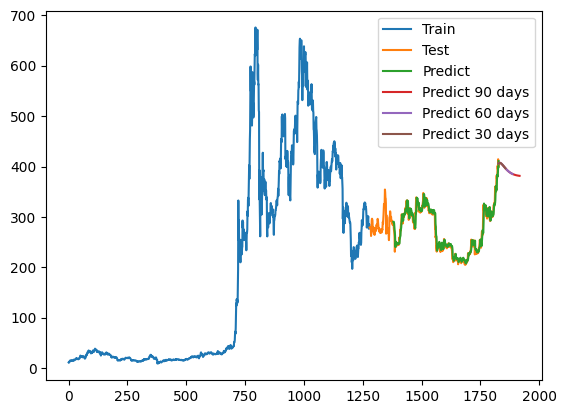

In [43]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 4. BTC/USD Dataset (Data split 8:2)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [45]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [46]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [47]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [48]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [49]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [50]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [51]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 2s 42ms/step - loss: 0.0331 - val_loss: 0.0016
Epoch 2/100
22/22 [==============================] - 1s 28ms/step - loss: 0.0034 - val_loss: 5.5753e-04
Epoch 3/100
22/22 [==============================] - 1s 30ms/step - loss: 8.3614e-04 - val_loss: 5.6123e-04
Epoch 4/100
22/22 [==============================] - 1s 29ms/step - loss: 7.0324e-04 - val_loss: 5.3636e-04
Epoch 5/100
22/22 [==============================] - 1s 29ms/step - loss: 6.4674e-04 - val_loss: 4.2901e-04
Epoch 6/100
22/22 [==============================] - 1s 29ms/step - loss: 6.2494e-04 - val_loss: 3.9961e-04
Epoch 7/100
22/22 [==============================] - 1s 29ms/step - loss: 6.0258e-04 - val_loss: 4.4318e-04
Epoch 8/100
22/22 [==============================] - 1s 31ms/step - loss: 5.9174e-04 - val_loss: 4.1647e-04
Epoch 9/100
22/22 [==============================] - 1s 29ms/step - loss: 5.5998e-04 - val_loss: 3.4997e-04
Epoch 10/100
22/22 [====================

In [53]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


In [54]:
y_pred=scaler.inverse_transform(y_pred)

In [55]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 35930.04603100297


In [56]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52623776 0.53278113 0.5339033  0.52861061 0.525498   0.53446595
 0.53506152 0.53283128 0.54803699 0.56012381 0.56818431 0.59989186
 0.63250999 0.62782697 0.62016456 0.63405689 0.62688817 0.62807774
 0.58843508 0.59207586 0.61384531 0.6160536  0.59892171 0.60438837
 0.59022961 0.6103926  0.6041235  0.62607946 0.62921088 0.63069822
 0.62670794 0.61532795 0.62473317 0.60802131 0.62252645 0.60905101
 0.60114568 0.60217851 0.60427553 0.63419168 0.64605909 0.61303816
 0.63363216 0.63365097 0.63078599 0.63015908 0.67762715 0.66444636
 0.67237677 0.66808087 0.6132278  0.61338453 0.59607241 0.60819842
 0.61793276 0.61231722 0.58904475 0.59468694 0.59526683 0.59345349
 0.56193402 0.56701983 0.57001646 0.56771883 0.59709427 0.60192148
 0.60051877 0.62044824 0.61489382 0.60923439 0.61700337 0.61883865
 0.61580911 0.60916699 0.61113863 0.61712405 0.63682313 0.65157276
 0.68030875 0.69022334 0.69836376 0.72439464 0.72082282 0.75304913
 0.75498472 0.75870386 0.75115743 0.75860826 0.753

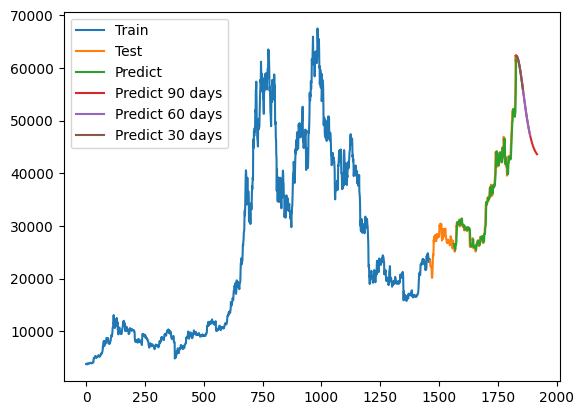

In [57]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 5. ETH/USD Dataset (Data split 8:2)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [59]:
df = pd.read_csv('../Dataset/ETH_USD Binance Historical Data (1).csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [60]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [61]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [62]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [63]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [64]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 2s 43ms/step - loss: 0.0497 - val_loss: 0.0035
Epoch 2/100
22/22 [==============================] - 1s 28ms/step - loss: 0.0048 - val_loss: 2.7520e-04
Epoch 3/100
22/22 [==============================] - 1s 28ms/step - loss: 0.0011 - val_loss: 3.5924e-04
Epoch 4/100
22/22 [==============================] - 1s 29ms/step - loss: 8.1637e-04 - val_loss: 3.1784e-04
Epoch 5/100
22/22 [==============================] - 1s 30ms/step - loss: 7.6471e-04 - val_loss: 2.4387e-04
Epoch 6/100
22/22 [==============================] - 1s 28ms/step - loss: 7.2738e-04 - val_loss: 2.5880e-04
Epoch 7/100
22/22 [==============================] - 1s 29ms/step - loss: 6.9591e-04 - val_loss: 2.3113e-04
Epoch 8/100
22/22 [==============================] - 1s 28ms/step - loss: 6.7608e-04 - val_loss: 2.2831e-04
Epoch 9/100
22/22 [==============================] - 1s 30ms/step - loss: 6.5704e-04 - val_loss: 2.1158e-04
Epoch 10/100
22/22 [========================

In [67]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 6ms/step


In [68]:
y_pred=scaler.inverse_transform(y_pred)

In [69]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 2025.5223714184617


In [70]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.4158102  0.41979487 0.42027567 0.41585913 0.4084344  0.41295094
 0.40876416 0.41357002 0.42115643 0.43766102 0.44362208 0.45442729
 0.46500061 0.45225305 0.47828002 0.47884804 0.47503994 0.47753116
 0.45053196 0.44588566 0.45794393 0.46967882 0.4494874  0.45132337
 0.44451134 0.44914913 0.44033945 0.44560909 0.45357419 0.4715616
 0.46824706 0.45866512 0.46032877 0.4516829  0.4831497  0.47586326
 0.46624941 0.46465171 0.4625647  0.47749287 0.47817364 0.44714935
 0.45945014 0.45963736 0.45375502 0.44969588 0.4730125  0.47585049
 0.52636842 0.53407822 0.51408251 0.52564722 0.50343473 0.51150407
 0.52783847 0.5156249  0.5025327  0.5072173  0.50301563 0.49983512
 0.46931503 0.45443154 0.45251047 0.44890448 0.45952248 0.45959694
 0.45725464 0.47021068 0.47559095 0.46283488 0.46733227 0.46840236
 0.46567713 0.4642475  0.46681318 0.48187537 0.49294226 0.49185727
 0.50602381 0.50901923 0.51038079 0.54254113 0.53875856 0.56750012
 0.57759903 0.5731761  0.56979775 0.58987429 0.6036

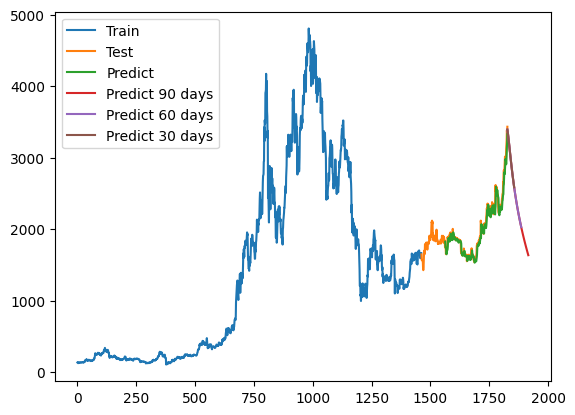

In [71]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 6. BNB/USD Dataset (Data split 8:2)

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [73]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [74]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [75]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [76]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [77]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [78]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [79]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [80]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 2s 43ms/step - loss: 0.0775 - val_loss: 0.0129
Epoch 2/100
22/22 [==============================] - 1s 29ms/step - loss: 0.0107 - val_loss: 3.9471e-04
Epoch 3/100
22/22 [==============================] - 1s 30ms/step - loss: 0.0015 - val_loss: 5.7059e-04
Epoch 4/100
22/22 [==============================] - 1s 29ms/step - loss: 0.0012 - val_loss: 2.2906e-04
Epoch 5/100
22/22 [==============================] - 1s 29ms/step - loss: 9.9762e-04 - val_loss: 2.1195e-04
Epoch 6/100
22/22 [==============================] - 1s 29ms/step - loss: 9.6183e-04 - val_loss: 2.8603e-04
Epoch 7/100
22/22 [==============================] - 1s 30ms/step - loss: 9.1379e-04 - val_loss: 1.9882e-04
Epoch 8/100
22/22 [==============================] - 1s 30ms/step - loss: 8.8935e-04 - val_loss: 1.7379e-04
Epoch 9/100
22/22 [==============================] - 1s 28ms/step - loss: 8.5854e-04 - val_loss: 1.8439e-04
Epoch 10/100
22/22 [============================

In [81]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 6ms/step


In [82]:
y_pred=scaler.inverse_transform(y_pred)

In [83]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 258.678144885561


In [84]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.3365425  0.33519285 0.33774219 0.33339332 0.32694499 0.3303941
 0.32694499 0.32739488 0.32874453 0.32964429 0.32814468 0.33624258
 0.33279347 0.3303941  0.33504289 0.34419051 0.34224102 0.34554016
 0.35558755 0.36758443 0.36413532 0.36593486 0.35333813 0.35258833
 0.34449043 0.34853938 0.36533501 0.37628217 0.39322776 0.39232799
 0.39217803 0.38258053 0.38617959 0.43266751 0.47195729 0.47015776
 0.45636135 0.46086018 0.45396197 0.45621139 0.45426189 0.45966049
 0.47150741 0.4619099  0.4469138  0.43941575 0.44136525 0.43761622
 0.44406454 0.44841341 0.4311679  0.43911583 0.43506688 0.46235979
 0.45861076 0.44991302 0.45531162 0.45801092 0.4619099  0.4638594
 0.44496431 0.43416712 0.42561934 0.42366985 0.43941575 0.44451443
 0.44391458 0.45201248 0.44751365 0.43671645 0.43611661 0.4380661
 0.4353668  0.44286486 0.43776618 0.44016556 0.44706376 0.46430928
 0.47180733 0.47060764 0.46700858 0.47780577 0.47300702 0.48680343
 0.51724552 0.52684302 0.51529602 0.51034731 0.513496

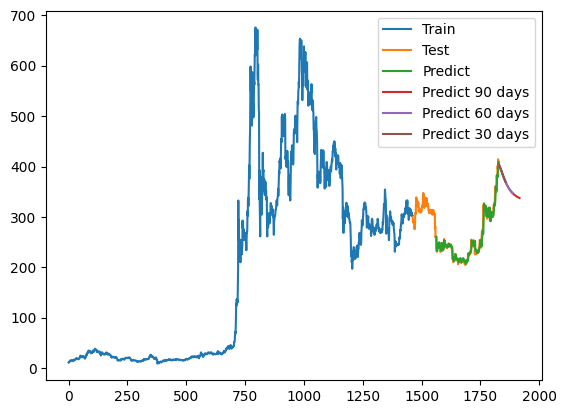

In [85]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 7. BTC/USD Dataset (Data split 9:1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 3s 43ms/step - loss: 0.0401 - val_loss: 0.0030
Epoch 2/100
25/25 [==============================] - 1s 30ms/step - loss: 0.0043 - val_loss: 9.3384e-04
Epoch 3/100
25/25 [==============================] - 1s 31ms/step - loss: 8.9533e-04 - val_loss: 7.8882e-04
Epoch 4/100
25/25 [==============================] - 1s 30ms/step - loss: 6.2266e-04 - val_loss: 8.2287e-04
Epoch 5/100
25/25 [==============================] - 1s 30ms/step - loss: 5.8098e-04 - val_loss: 8.0864e-04
Epoch 6/100
25/25 [==============================] - 1s 30ms/step - loss: 5.4824e-04 - val_loss: 7.1154e-04
Epoch 7/100
25/25 [==============================] - 1s 30ms/step - loss: 5.4953e-04 - val_loss: 7.1121e-04
Epoch 8/100
25/25 [==============================] - 1s 30ms/step - loss: 5.1250e-04 - val_loss: 6.8061e-04
Epoch 9/100
25/25 [==============================] - 1s 31ms/step - loss: 5.0985e-04 - val_loss: 6.7516e-04
Epoch 10/100
25/25 [====================

In [10]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 45711.79667071956


In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52623776 0.53278113 0.5339033  0.52861061 0.525498   0.53446595
 0.53506152 0.53283128 0.54803699 0.56012381 0.56818431 0.59989186
 0.63250999 0.62782697 0.62016456 0.63405689 0.62688817 0.62807774
 0.58843508 0.59207586 0.61384531 0.6160536  0.59892171 0.60438837
 0.59022961 0.6103926  0.6041235  0.62607946 0.62921088 0.63069822
 0.62670794 0.61532795 0.62473317 0.60802131 0.62252645 0.60905101
 0.60114568 0.60217851 0.60427553 0.63419168 0.64605909 0.61303816
 0.63363216 0.63365097 0.63078599 0.63015908 0.67762715 0.66444636
 0.67237677 0.66808087 0.6132278  0.61338453 0.59607241 0.60819842
 0.61793276 0.61231722 0.58904475 0.59468694 0.59526683 0.59345349
 0.56193402 0.56701983 0.57001646 0.56771883 0.59709427 0.60192148
 0.60051877 0.62044824 0.61489382 0.60923439 0.61700337 0.61883865
 0.61580911 0.60916699 0.61113863 0.61712405 0.63682313 0.65157276
 0.68030875 0.69022334 0.69836376 0.72439464 0.72082282 0.75304913
 0.75498472 0.75870386 0.75115743 0.75860826 0.753

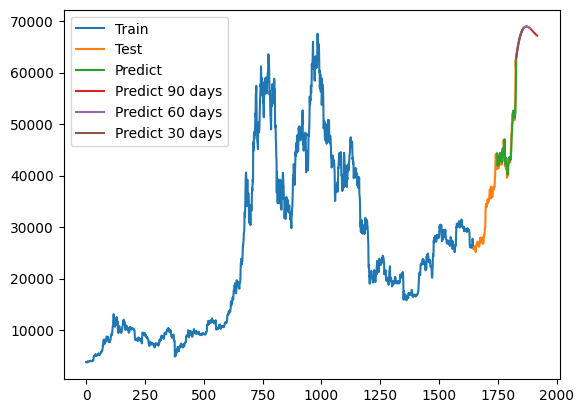

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 8. ETH/USD Dataset (Data split 9:1)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [17]:
df = pd.read_csv('../Dataset/ETH_USD Binance Historical Data (1).csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [21]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 2s 40ms/step - loss: 0.0250 - val_loss: 0.0042
Epoch 2/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0020 - val_loss: 4.0394e-04
Epoch 3/100
25/25 [==============================] - 1s 26ms/step - loss: 7.1680e-04 - val_loss: 4.3650e-04
Epoch 4/100
25/25 [==============================] - 1s 27ms/step - loss: 6.0584e-04 - val_loss: 3.9749e-04
Epoch 5/100
25/25 [==============================] - 1s 27ms/step - loss: 5.8292e-04 - val_loss: 4.3502e-04
Epoch 6/100
25/25 [==============================] - 1s 27ms/step - loss: 5.6001e-04 - val_loss: 4.2627e-04
Epoch 7/100
25/25 [==============================] - 1s 27ms/step - loss: 5.4198e-04 - val_loss: 3.4988e-04
Epoch 8/100
25/25 [==============================] - 1s 27ms/step - loss: 5.3082e-04 - val_loss: 3.5221e-04
Epoch 9/100
25/25 [==============================] - 1s 28ms/step - loss: 5.2547e-04 - val_loss: 4.1728e-04
Epoch 10/100
25/25 [====================

In [26]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [27]:
y_pred=scaler.inverse_transform(y_pred)

In [28]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 2452.509614161755


In [29]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.4158102  0.41979487 0.42027567 0.41585913 0.4084344  0.41295094
 0.40876416 0.41357002 0.42115643 0.43766102 0.44362208 0.45442729
 0.46500061 0.45225305 0.47828002 0.47884804 0.47503994 0.47753116
 0.45053196 0.44588566 0.45794393 0.46967882 0.4494874  0.45132337
 0.44451134 0.44914913 0.44033945 0.44560909 0.45357419 0.4715616
 0.46824706 0.45866512 0.46032877 0.4516829  0.4831497  0.47586326
 0.46624941 0.46465171 0.4625647  0.47749287 0.47817364 0.44714935
 0.45945014 0.45963736 0.45375502 0.44969588 0.4730125  0.47585049
 0.52636842 0.53407822 0.51408251 0.52564722 0.50343473 0.51150407
 0.52783847 0.5156249  0.5025327  0.5072173  0.50301563 0.49983512
 0.46931503 0.45443154 0.45251047 0.44890448 0.45952248 0.45959694
 0.45725464 0.47021068 0.47559095 0.46283488 0.46733227 0.46840236
 0.46567713 0.4642475  0.46681318 0.48187537 0.49294226 0.49185727
 0.50602381 0.50901923 0.51038079 0.54254113 0.53875856 0.56750012
 0.57759903 0.5731761  0.56979775 0.58987429 0.6036

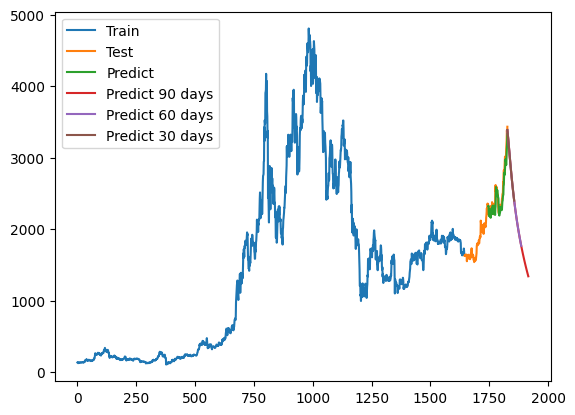

In [30]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 9. BNB/USD Dataset (Data split 9:1)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [32]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [33]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [34]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [35]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 3s 40ms/step - loss: 0.0254 - val_loss: 0.0030
Epoch 2/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0024 - val_loss: 3.6435e-04
Epoch 3/100
25/25 [==============================] - 1s 27ms/step - loss: 8.4616e-04 - val_loss: 3.7953e-04
Epoch 4/100
25/25 [==============================] - 1s 28ms/step - loss: 7.4027e-04 - val_loss: 3.7129e-04
Epoch 5/100
25/25 [==============================] - 1s 27ms/step - loss: 7.1201e-04 - val_loss: 4.6101e-04
Epoch 6/100
25/25 [==============================] - 1s 27ms/step - loss: 6.9720e-04 - val_loss: 3.8675e-04
Epoch 7/100
25/25 [==============================] - 1s 28ms/step - loss: 6.6225e-04 - val_loss: 3.1614e-04
Epoch 8/100
25/25 [==============================] - 1s 28ms/step - loss: 6.4232e-04 - val_loss: 2.8640e-04
Epoch 9/100
25/25 [==============================] - 1s 29ms/step - loss: 6.4083e-04 - val_loss: 4.0387e-04
Epoch 10/100
25/25 [====================

In [40]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [41]:
y_pred=scaler.inverse_transform(y_pred)

In [42]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 308.3252504158273


In [43]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.3365425  0.33519285 0.33774219 0.33339332 0.32694499 0.3303941
 0.32694499 0.32739488 0.32874453 0.32964429 0.32814468 0.33624258
 0.33279347 0.3303941  0.33504289 0.34419051 0.34224102 0.34554016
 0.35558755 0.36758443 0.36413532 0.36593486 0.35333813 0.35258833
 0.34449043 0.34853938 0.36533501 0.37628217 0.39322776 0.39232799
 0.39217803 0.38258053 0.38617959 0.43266751 0.47195729 0.47015776
 0.45636135 0.46086018 0.45396197 0.45621139 0.45426189 0.45966049
 0.47150741 0.4619099  0.4469138  0.43941575 0.44136525 0.43761622
 0.44406454 0.44841341 0.4311679  0.43911583 0.43506688 0.46235979
 0.45861076 0.44991302 0.45531162 0.45801092 0.4619099  0.4638594
 0.44496431 0.43416712 0.42561934 0.42366985 0.43941575 0.44451443
 0.44391458 0.45201248 0.44751365 0.43671645 0.43611661 0.4380661
 0.4353668  0.44286486 0.43776618 0.44016556 0.44706376 0.46430928
 0.47180733 0.47060764 0.46700858 0.47780577 0.47300702 0.48680343
 0.51724552 0.52684302 0.51529602 0.51034731 0.513496

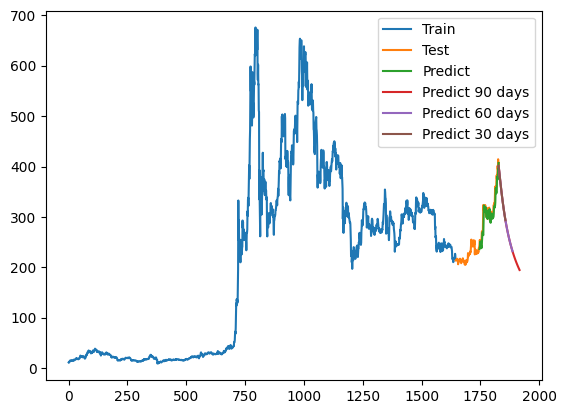

In [44]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()